<bound method NDFrame.head of        Month  Monthly milk production
0    1962-01                      589
1    1962-02                      561
2    1962-03                      640
3    1962-04                      656
4    1962-05                      727
..       ...                      ...
163  1975-08                      858
164  1975-09                      817
165  1975-10                      827
166  1975-11                      797
167      NaN                      843

[168 rows x 2 columns]>
-------------------------------------------------------------------------------



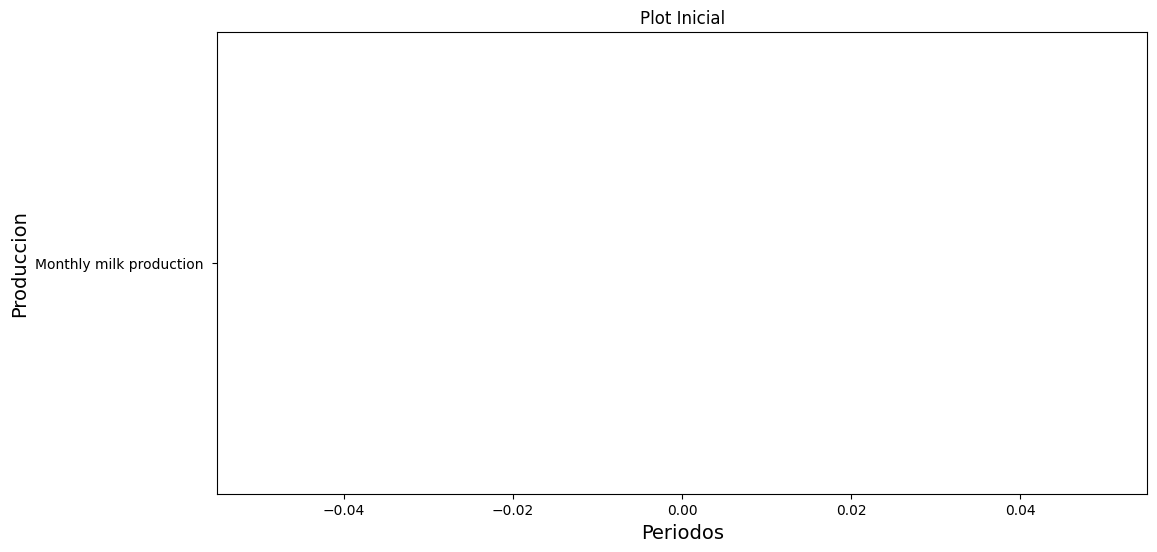

       Month  Monthly milk production     year
0    1962-01                      589  1962-01
1    1962-02                      561  1962-02
2    1962-03                      640  1962-03
3    1962-04                      656  1962-04
4    1962-05                      727  1962-05
..       ...                      ...      ...
163  1975-08                      858  1975-08
164  1975-09                      817  1975-09
165  1975-10                      827  1975-10
166  1975-11                      797  1975-11
167      NaN                      843      NaN

[168 rows x 3 columns]
-------------------------------------------------------------------------------

        year  Monthly milk production
0    1962-01                      589
1    1962-02                      561
2    1962-03                      640
3    1962-04                      656
4    1962-05                      727
..       ...                      ...
162  1975-07                      896
163  1975-08               

<ipython-input-78-2977f1a24571>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anual = df.groupby(by=['year']).sum().reset_index()


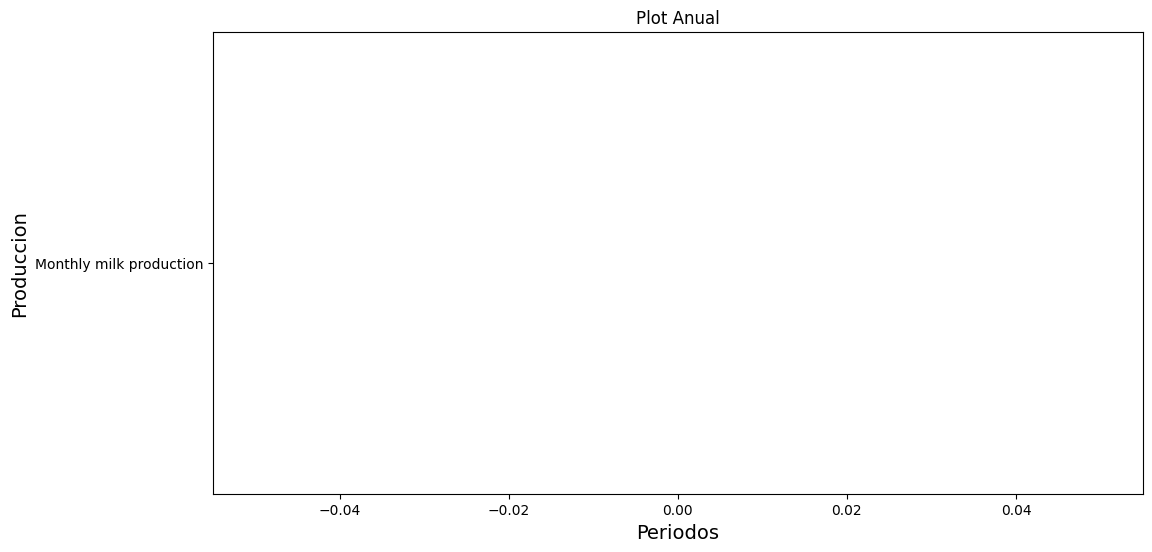

        year  Monthly milk production          MA
0    1962-01                      589         NaN
1    1962-02                      561         NaN
2    1962-03                      640         NaN
3    1962-04                      656  596.666667
4    1962-05                      727  619.000000
..       ...                      ...         ...
162  1975-07                      896  935.333333
163  1975-08                      858  933.000000
164  1975-09                      817  897.000000
165  1975-10                      827  857.000000
166  1975-11                      797  834.000000

[167 rows x 3 columns]
-------------------------------------------------------------------------------



ValueError: ignored

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

url= 'https://raw.githubusercontent.com/JesusContr/Mineria-de-datos/main/monthly-milk-production.csv'
df= pd.read_csv(url)



print(df.head)
print('-------------------------------------------------------------------------------\n')

plt.figure(figsize=(12, 6))
plt.plot('Monthly milk production ')
plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Produccion', fontsize=14)
plt.title('Plot Inicial')
plt.show()

df['year'] = df['Month']
print(df)
print('-------------------------------------------------------------------------------\n')

anual = df.groupby(by=['year']).sum().reset_index()
print(anual)
print('-------------------------------------------------------------------------------\n')

plt.figure(figsize=(12, 6))
plt.plot('Monthly milk production')
plt.xlabel('Periodos', fontsize=14)
plt.ylabel('Produccion', fontsize=14)
plt.title('Plot Anual')
plt.show()

anual['MA'] = anual['Monthly milk production'].rolling(window=3).mean().shift(1)
print(anual)
print('-------------------------------------------------------------------------------\n')

df = df[df.loc[: , 'Monthly milk production'] !='1975-11']

df.loc[:, 'Monthly milk production'] =df.loc[: , 'Monthly milk production'].apply(lambda x : int(x) *2)

anual.loc[len(anual)] = [int(anual.iloc[len(anual)-1][0])+1,0,0]
print(anual)
print('-------------------------------------------------------------------------------\n')


anual['MA'] = anual['Monthly milk production'].rolling(window=3).mean().shift(1)
anual['year'] = anual['year'].astype(int)
anual['Monthly milk production'] = anual['Monthly milk production'].astype(float)
anual['MA'] = anual['MA'].astype(float)
print(anual)
print('-------------------------------------------------------------------------------\n')

plt.figure(figsize=(12, 6))
plt.plot(anual['year'][:-1], anual['Monthly milk production'][:-1], '-o', color = 'red', label = 'data')
plt.plot(anual['year'], anual['MA'], '-o', color = 'blue', label = 'forecast')
plt.xlabel('Años', fontsize=14)
plt.ylabel('Produccion', fontsize=14)
plt.legend(loc = 'best')
plt.show()

